Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


Load Data

In [2]:
df = pd.read_csv("../data/raw/complaints.csv")
print(df.shape)
df.head()


C:\Users\Kal\AppData\Local\Temp\ipykernel_24816\1982928331.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


(9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


Check Columns

In [3]:
df.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Product Distribution (EDA)

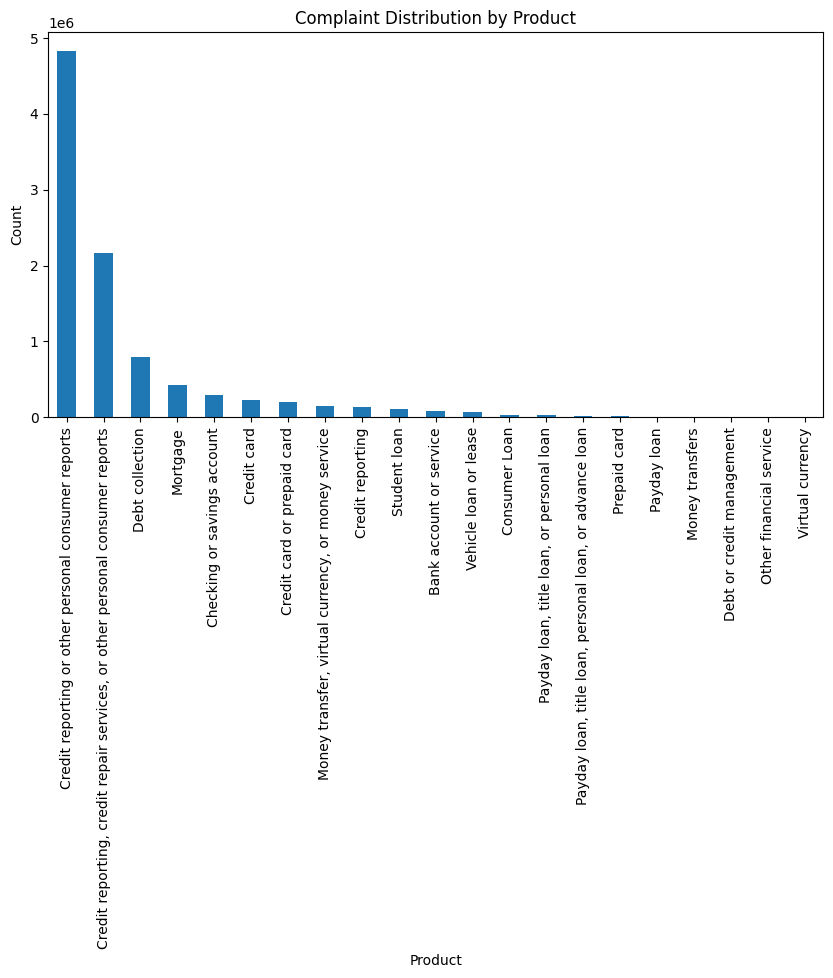

In [4]:
plt.figure(figsize=(10,5))
df['Product'].value_counts().plot(kind='bar')
plt.title("Complaint Distribution by Product")
plt.ylabel("Count")
plt.show()


Narrative Length Analysis

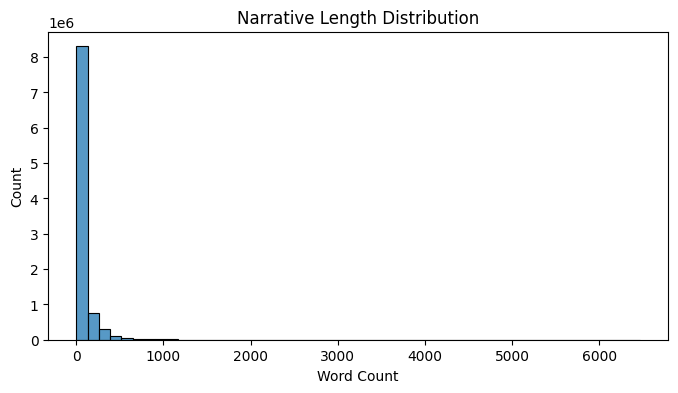

In [5]:
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df['narrative_length'], bins=50)
plt.title("Narrative Length Distribution")
plt.xlabel("Word Count")
plt.show()


Missing Narrative Check

In [6]:
df['Consumer complaint narrative'].isna().value_counts()


Consumer complaint narrative
True     6629041
False    2980756
Name: count, dtype: int64

Filter Required Products

In [ ]:
TARGET_PRODUCTS = [
    "Credit card",
    "Personal loans",
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]

df_filtered = df[
    df['Product'].isin(TARGET_PRODUCTS) &
    df['Consumer complaint narrative'].notna()
].copy()

print(df_filtered.shape)


(82164, 19)


Text Cleaning Function

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i am writing to file a complaint", "", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Applying text cleaning
df_filtered['clean_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


Save Clean Dataset

In [9]:
df_filtered.to_csv("../data/processed/filtered_complaints.csv", index=False)
